# **EXample 1**

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Classroom/Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 3]].values
y = dataset.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
X[:,0]=lb.fit_transform(X[:,0])

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

print('Accuracy of Train : ',classifier.score(X_train, y_train))
print('Accuracy of Test : ',classifier.score(X_test, y_test))


Accuracy of Train :  0.7733333333333333
Accuracy of Test :  0.8


In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [18 14]]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(X, test_size = 0.25, random_state = 0)


# **EXample 2**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [11]:
# تحميل البيانات
data = load_breast_cancer()
X = data.data
y = data.target

In [12]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# تطبيع البيانات لتحسين الأداء
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# create logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# prediction
y_pred = model.predict(X_test)

In [16]:
# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


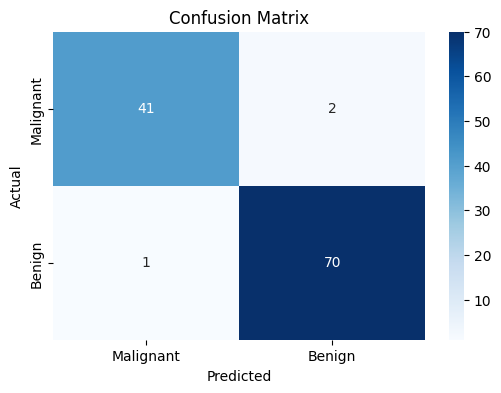

In [17]:
# رسم المصفوفة التشابكية (Confusion Matrix)
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **EXample 3**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [19]:
# تحميل البيانات
iris = load_iris()
X = iris.data  # الميزات (Features)
y = iris.target  # التصنيفات (0: Setosa, 1: Versicolor, 2: Virginica)

In [20]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# تطبيع البيانات لتحسين الأداء
scaler = StandardScaler()   #StandardScaler() لضمان ثبات القيم
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
# إنشاء نموذج الانحدار اللوجستي
model = LogisticRegression(multi_class='ovr', solver='liblinear')  # one-vs-rest لتصنيف متعدد الفئات
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [23]:
# التنبؤ بالقيم
y_pred = model.predict(X_test)


In [24]:
# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



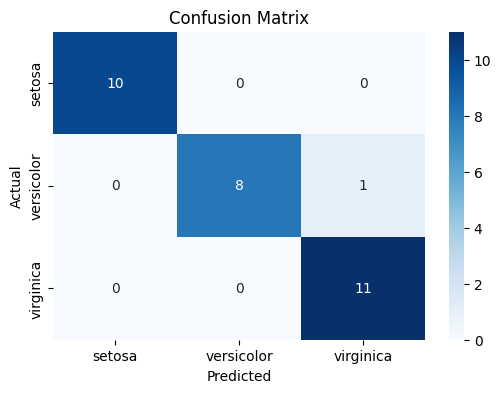

In [25]:
# رسم المصفوفة التشابكية (Confusion Matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()